In [13]:
import cv2  # Import OpenCV
import os
import shutil
from ultralytics import YOLO 
from datetime import datetime
import numpy as np
import tqdm

In [14]:
model = YOLO('yolov8m-seg.pt')

In [59]:
test_images_dir = 'laptop_dataset'
output_dir = test_images_dir  # To save annotated images in the same directory
laptop_output_dir = 'laptop_dataset3'

# Ensure output_dir exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
def resize_mask(mask, frame_shape):
    """
    Resize the mask to match the frame's shape.
    
    :param mask: The mask to resize.
    :param frame_shape: The shape of the frame.
    :return: Resized mask.
    """
    # Resize the mask to match the frame's dimensions
    return cv2.resize(mask, (frame_shape[1], frame_shape[0]), interpolation=cv2.INTER_NEAREST)
def segment_and_annotate_images():
    # List all images in the testImages directory
    images = [img for img in os.listdir(test_images_dir) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    for img_name in tqdm.tqdm(images):
        if(img_name.startswith("annotated") or img_name.startswith("laptop")):
            continue
        img_path = os.path.join(test_images_dir, img_name)
        frame = cv2.imread(img_path)

        # Make predictions on the frame
        pred = model.predict(img_path)[0]  # Assume this returns a list of predictions with masks
        frame_with_overlay = pred.plot()
        # Here you would process your predictions and overlay them on the frame
        # For the sake of example, let's assume you have a function that does this:
        # frame_with_overlay = apply_predictions_to_frame(frame, pred)
        
        # Save the annotated image
        annotated_img_name = f"annotated_{img_name}"
        annotated_img_path = os.path.join(output_dir, annotated_img_name)
        cv2.imwrite(annotated_img_path, frame_with_overlay)
        
        #print(f"masks: {pred[0].masks}")

        #print(type(pred))
        #print(pred)
      
        # Now, segment out each laptop if the predictions include bounding boxes or masks for laptops
        laptopCount = 0
        laptop_class_id = 63
        for detection in pred:
            if detection.boxes and detection.masks:  # Ensure there are boxes and masks
                for i, box in enumerate(detection.boxes):
                    #print(box.cls)
                    if box.cls.item() == laptop_class_id or box.cls.item() == 73:  # Check if the detected class is a laptop
                        mask = detection.masks.data[i]  # Get the corresponding mask
                        resized_mask = resize_mask(mask.numpy(), frame.shape)

                        print(f"item: {box.cls.item()}")
                        # The mask is a binary (0 or 1) numpy array with the same height and width as the frame
                        # Convert mask to a boolean array where True represents the laptop
                        mask_bool = resized_mask.astype(bool)

                        # Find bounds for cropping using the mask
                        rows = np.any(mask_bool, axis=1)
                        cols = np.any(mask_bool, axis=0)
                        rows_nonzero = np.where(rows)[0]
                        cols_nonzero = np.where(cols)[0]

                        if rows_nonzero.size and cols_nonzero.size:
                            y_min, y_max = rows_nonzero[[0, -1]]
                            x_min, x_max = cols_nonzero[[0, -1]]
                            margin = 30  # Define the margin size

                            # Ensure the margin does not exceed the image bounds
                            y_min = max(y_min - margin, 0)
                            y_max = min(y_max + margin, frame.shape[0] - 1)
                            x_min = max(x_min - margin, 0)
                            x_max = min(x_max + margin, frame.shape[1] - 1)

                            # Crop the original image (frame) to these bounds
                            laptop_img_cropped = frame[y_min:y_max+1, x_min:x_max+1]
                        else:
                            laptop_img_cropped = frame

                        # laptop_img_cropped now contains the zoomed-in part of the image
                        # Save or process the laptop_img as needed
                        # For example, to save:
                        laptop_img_name = f"laptop{laptopCount}_{img_name}"
                        laptopCount+=1
                        laptop_img_path = f"{laptop_output_dir}/{laptop_img_name}"
                        cv2.imwrite(laptop_img_path, laptop_img_cropped)
# Execute the function



# Process the images
segment_and_annotate_images()

  0%|          | 0/333 [00:00<?, ?it/s]


image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3643.png: 640x480 3 persons, 1 bottle, 1 cup, 2 laptops, 1 cell phone, 925.7ms
Speed: 22.2ms preprocess, 925.7ms inference, 26.6ms postprocess per image at shape (1, 3, 640, 480)
item: 63.0
item: 63.0


  2%|▏         | 7/333 [00:02<01:50,  2.95it/s]


image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3657.png: 640x480 2 persons, 2 bottles, 1 dining table, 2 mouses, 1 cell phone, 1 book, 439.1ms
Speed: 3.7ms preprocess, 439.1ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 480)


  2%|▏         | 8/333 [00:03<02:58,  1.82it/s]

item: 73.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3656.png: 640x480 2 persons, 3 bottles, 1 cup, 1 dining table, 3 laptops, 1 mouse, 1 cell phone, 1 book, 414.9ms
Speed: 2.4ms preprocess, 414.9ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 480)
item: 63.0
item: 63.0
item: 63.0
item: 73.0


  3%|▎         | 11/333 [00:05<02:56,  1.83it/s]


image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3642.png: 640x480 4 persons, 2 bottles, 1 cup, 1 tv, 2 laptops, 1 cell phone, 520.1ms
Speed: 2.6ms preprocess, 520.1ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 480)
item: 63.0
item: 63.0


  4%|▎         | 12/333 [00:07<04:08,  1.29it/s]


image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3668.png: 640x480 2 persons, 1 bottle, 2 cups, 1 chair, 2 tvs, 1 laptop, 1 keyboard, 1 book, 452.5ms
Speed: 2.9ms preprocess, 452.5ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 480)


  8%|▊         | 26/333 [00:09<01:25,  3.60it/s]

item: 63.0
item: 73.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3654.png: 640x480 2 persons, 2 bottles, 2 cups, 1 laptop, 2 cell phones, 497.7ms
Speed: 3.5ms preprocess, 497.7ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 480)


  9%|▊         | 29/333 [00:11<01:42,  2.96it/s]

item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3640.png: 640x480 3 persons, 5 bottles, 1 cup, 2 laptops, 1 keyboard, 2 cell phones, 510.0ms
Speed: 3.3ms preprocess, 510.0ms inference, 9.7ms postprocess per image at shape (1, 3, 640, 480)


  9%|▉         | 30/333 [00:12<02:22,  2.13it/s]

item: 63.0
item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3641.png: 640x480 3 persons, 3 bottles, 1 cup, 1 laptop, 1 keyboard, 2 cell phones, 476.8ms
Speed: 2.8ms preprocess, 476.8ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 480)


  9%|▉         | 31/333 [00:14<03:07,  1.61it/s]

item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3655.png: 640x480 2 persons, 2 bottles, 1 cup, 1 mouse, 1 cell phone, 1 book, 448.9ms
Speed: 2.4ms preprocess, 448.9ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 480)


 10%|▉         | 33/333 [00:16<03:28,  1.44it/s]

item: 73.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3669.png: 640x480 2 persons, 2 cups, 1 chair, 2 tvs, 1 laptop, 1 keyboard, 1 book, 465.3ms
Speed: 2.6ms preprocess, 465.3ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 480)


 11%|█         | 35/333 [00:18<03:45,  1.32it/s]

item: 63.0
item: 73.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3651.png: 640x480 2 persons, 1 bottle, 2 laptops, 1 keyboard, 1 cell phone, 2 books, 520.5ms
Speed: 2.4ms preprocess, 520.5ms inference, 6.9ms postprocess per image at shape (1, 3, 640, 480)
item: 63.0
item: 73.0
item: 73.0
item: 63.0


 15%|█▌        | 51/333 [00:20<01:22,  3.42it/s]


image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3645.png: 640x480 2 persons, 2 bottles, 1 cup, 2 laptops, 1 book, 1 scissors, 503.5ms
Speed: 2.4ms preprocess, 503.5ms inference, 9.1ms postprocess per image at shape (1, 3, 640, 480)
item: 73.0
item: 63.0


 16%|█▌        | 53/333 [00:22<01:45,  2.65it/s]

item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3644.png: 640x480 4 persons, 2 bottles, 1 cup, 1 tv, 2 laptops, 2 cell phones, 1 book, 492.4ms
Speed: 2.9ms preprocess, 492.4ms inference, 7.4ms postprocess per image at shape (1, 3, 640, 480)
item: 63.0
item: 63.0


 18%|█▊        | 59/333 [00:24<01:41,  2.70it/s]

item: 73.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3650.png: 640x480 3 persons, 1 bottle, 1 laptop, 1 cell phone, 454.8ms
Speed: 2.6ms preprocess, 454.8ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 480)


 18%|█▊        | 60/333 [00:26<02:10,  2.10it/s]

item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3646.png: 640x480 1 person, 2 bottles, 2 cups, 1 laptop, 1 book, 449.0ms
Speed: 2.4ms preprocess, 449.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 480)


 22%|██▏       | 74/333 [00:28<01:10,  3.66it/s]

item: 73.0
item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3652.png: 640x480 2 persons, 1 bottle, 3 cups, 2 dining tables, 1 laptop, 2 cell phones, 438.4ms
Speed: 2.8ms preprocess, 438.4ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 480)


 23%|██▎       | 75/333 [00:30<01:31,  2.83it/s]

item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3653.png: 640x480 2 persons, 2 bottles, 3 cups, 1 orange, 2 dining tables, 1 laptop, 2 cell phones, 645.4ms
Speed: 5.0ms preprocess, 645.4ms inference, 7.1ms postprocess per image at shape (1, 3, 640, 480)


 24%|██▍       | 80/333 [00:32<01:34,  2.69it/s]

item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3647.png: 640x480 1 person, 1 cup, 1 laptop, 1 book, 543.2ms
Speed: 4.3ms preprocess, 543.2ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 480)
item: 73.0
item: 63.0


 24%|██▍       | 81/333 [00:34<02:07,  1.97it/s]


image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3595.png: 640x480 1 person, 6 bottles, 2 cups, 2 chairs, 4 laptops, 3 mouses, 2 keyboards, 1 cell phone, 536.4ms
Speed: 3.0ms preprocess, 536.4ms inference, 11.5ms postprocess per image at shape (1, 3, 640, 480)
item: 63.0
item: 63.0
item: 63.0
item: 63.0


 27%|██▋       | 90/333 [00:36<01:32,  2.63it/s]


image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3608.png: 640x480 1 person, 5 bottles, 1 cup, 1 chair, 1 dining table, 1 laptop, 1 mouse, 2 keyboards, 1 book, 508.5ms
Speed: 3.5ms preprocess, 508.5ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 480)


 29%|██▊       | 95/333 [00:38<01:33,  2.55it/s]

item: 73.0
item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3620.png: 640x480 1 person, 1 handbag, 2 bottles, 2 chairs, 1 dining table, 1 laptop, 1 keyboard, 1 book, 446.0ms
Speed: 2.9ms preprocess, 446.0ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 480)


 29%|██▉       | 96/333 [00:40<01:58,  1.99it/s]

item: 63.0
item: 73.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3634.png: 640x480 4 persons, 1 skateboard, 3 bottles, 1 cup, 1 chair, 2 laptops, 1 keyboard, 1 book, 642.5ms
Speed: 4.2ms preprocess, 642.5ms inference, 11.8ms postprocess per image at shape (1, 3, 640, 480)


 29%|██▉       | 97/333 [00:43<02:40,  1.47it/s]

item: 63.0
item: 63.0
item: 73.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3635.png: 640x480 3 persons, 4 bottles, 1 cup, 1 chair, 2 laptops, 484.1ms
Speed: 2.7ms preprocess, 484.1ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 480)


 30%|██▉       | 99/333 [00:44<02:50,  1.37it/s]

item: 63.0
item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3621.png: 640x480 2 persons, 1 handbag, 1 cup, 1 laptop, 1 mouse, 537.5ms
Speed: 3.5ms preprocess, 537.5ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 480)


 30%|███       | 100/333 [00:46<03:25,  1.13it/s]

item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3609.png: 640x480 2 persons, 5 bottles, 2 cups, 1 fork, 1 bowl, 1 chair, 1 dining table, 1 laptop, 506.4ms
Speed: 2.5ms preprocess, 506.4ms inference, 8.4ms postprocess per image at shape (1, 3, 640, 480)


 30%|███       | 101/333 [00:48<04:06,  1.06s/it]

item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3594.png: 640x480 1 person, 2 bottles, 2 chairs, 4 laptops, 3 mouses, 799.9ms
Speed: 4.4ms preprocess, 799.9ms inference, 10.6ms postprocess per image at shape (1, 3, 640, 480)
item: 63.0
item: 63.0
item: 63.0


 32%|███▏      | 106/333 [00:51<03:03,  1.24it/s]

item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3596.png: 640x480 1 person, 2 bottles, 2 laptops, 1 mouse, 2 keyboards, 1 cell phone, 1 book, 576.3ms
Speed: 3.1ms preprocess, 576.3ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 480)


 34%|███▍      | 114/333 [00:53<01:52,  1.94it/s]

item: 63.0
item: 73.0
item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3637.png: 640x480 2 persons, 4 bottles, 1 laptop, 1 clock, 536.7ms
Speed: 3.2ms preprocess, 536.7ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 480)


 36%|███▌      | 119/333 [00:55<01:40,  2.13it/s]

item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3623.png: 640x480 1 person, 1 cat, 1 handbag, 1 cup, 1 dining table, 1 laptop, 1 mouse, 1 cell phone, 1 book, 503.2ms
Speed: 2.8ms preprocess, 503.2ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 480)
item: 63.0
item: 73.0


 36%|███▌      | 120/333 [00:57<02:08,  1.65it/s]


image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3622.png: 640x480 1 person, 1 cat, 2 backpacks, 1 handbag, 1 laptop, 1 mouse, 1 keyboard, 464.6ms
Speed: 3.6ms preprocess, 464.6ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 480)


 36%|███▋      | 121/333 [00:59<02:40,  1.32it/s]

item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3636.png: 640x480 2 persons, 4 bottles, 1 laptop, 1 cell phone, 1 clock, 602.8ms
Speed: 3.6ms preprocess, 602.8ms inference, 7.1ms postprocess per image at shape (1, 3, 640, 480)


 37%|███▋      | 122/333 [01:02<03:22,  1.04it/s]

item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3597.png: 640x480 1 tv, 1 laptop, 1 mouse, 2 books, 599.9ms
Speed: 3.5ms preprocess, 599.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 480)
item: 73.0
item: 73.0


 38%|███▊      | 126/333 [01:04<02:49,  1.22it/s]

item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3632.png: 640x480 1 person, 2 bottles, 1 laptop, 1 keyboard, 1 cell phone, 611.0ms
Speed: 4.5ms preprocess, 611.0ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 480)


 41%|████      | 135/333 [01:06<01:36,  2.04it/s]

item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3626.png: 640x480 1 person, 1 bottle, 1 cell phone, 1 book, 442.0ms
Speed: 3.9ms preprocess, 442.0ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 480)


 41%|████      | 136/333 [01:09<02:03,  1.59it/s]

item: 73.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3627.png: 640x480 2 persons, 2 laptops, 1 mouse, 1 book, 841.1ms
Speed: 3.7ms preprocess, 841.1ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 480)
item: 63.0
item: 63.0


 42%|████▏     | 139/333 [01:11<02:16,  1.42it/s]

item: 73.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3633.png: 640x480 3 persons, 2 bottles, 1 cup, 2 laptops, 1 book, 539.5ms
Speed: 3.1ms preprocess, 539.5ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 480)


 42%|████▏     | 140/333 [01:14<02:49,  1.14it/s]

item: 63.0
item: 63.0
item: 73.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3592.png: 640x480 1 person, 1 backpack, 2 bottles, 2 cups, 1 fork, 2 bowls, 2 dining tables, 1 laptop, 603.7ms
Speed: 3.8ms preprocess, 603.7ms inference, 8.2ms postprocess per image at shape (1, 3, 640, 480)


 43%|████▎     | 143/333 [01:16<02:36,  1.22it/s]

item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3590.png: 640x480 2 persons, 1 backpack, 1 handbag, 2 bottles, 2 cups, 1 fork, 1 knife, 1 bowl, 1 chair, 2 dining tables, 1 keyboard, 1 cell phone, 456.3ms
Speed: 2.7ms preprocess, 456.3ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 480)


 44%|████▍     | 148/333 [01:17<01:53,  1.63it/s]


image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3625.png: 640x480 1 person, 1 bottle, 1 laptop, 2 mouses, 1 cell phone, 457.0ms
Speed: 2.8ms preprocess, 457.0ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 480)


 46%|████▌     | 153/333 [01:19<01:33,  1.92it/s]

item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3631.png: 640x480 2 persons, 2 bottles, 1 chair, 1 dining table, 1 laptop, 1 cell phone, 486.4ms
Speed: 3.2ms preprocess, 486.4ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 480)


 46%|████▌     | 154/333 [01:21<01:56,  1.54it/s]

item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3619.png: 640x480 2 persons, 1 bench, 1 suitcase, 2 bottles, 1 chair, 1 dining table, 2 laptops, 1 mouse, 2 cell phones, 448.0ms
Speed: 2.5ms preprocess, 448.0ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 480)


 47%|████▋     | 156/333 [01:23<02:02,  1.44it/s]

item: 63.0
item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3618.png: 640x480 2 persons, 1 handbag, 2 bottles, 1 chair, 2 laptops, 2 mouses, 1 keyboard, 1 cell phone, 455.5ms
Speed: 3.2ms preprocess, 455.5ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 480)


 47%|████▋     | 158/333 [01:25<02:11,  1.33it/s]

item: 63.0
item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3630.png: 640x480 1 person, 1 skateboard, 2 bottles, 1 dining table, 1 laptop, 428.1ms
Speed: 3.8ms preprocess, 428.1ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 480)


 48%|████▊     | 159/333 [01:26<02:38,  1.10it/s]

item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3624.png: 640x480 1 person, 2 bottles, 1 couch, 1 laptop, 1 cell phone, 435.7ms
Speed: 3.6ms preprocess, 435.7ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 480)


 48%|████▊     | 161/333 [01:28<02:34,  1.12it/s]

item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3591.png: 640x480 1 person, 1 backpack, 1 handbag, 2 bottles, 2 cups, 1 fork, 1 bowl, 1 chair, 1 dining table, 2 laptops, 1 remote, 1 keyboard, 2 books, 461.2ms
Speed: 3.0ms preprocess, 461.2ms inference, 7.8ms postprocess per image at shape (1, 3, 640, 480)


 50%|████▉     | 166/333 [01:30<01:46,  1.57it/s]

item: 63.0
item: 73.0
item: 63.0
item: 73.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3629.png: 640x480 2 persons, 1 dining table, 1 laptop, 1 mouse, 1 cell phone, 2 books, 417.5ms
Speed: 2.4ms preprocess, 417.5ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 480)
item: 63.0
item: 73.0
item: 73.0


 53%|█████▎    | 177/333 [01:32<00:54,  2.88it/s]


image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3601.png: 640x480 2 persons, 1 bottle, 1 chair, 2 laptops, 2 mouses, 2 keyboards, 1 book, 412.4ms
Speed: 2.4ms preprocess, 412.4ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 480)


 53%|█████▎    | 178/333 [01:34<01:12,  2.15it/s]

item: 63.0
item: 63.0
item: 73.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3615.png: 640x480 2 persons, 3 bottles, 2 chairs, 1 laptop, 2 keyboards, 2 cell phones, 1 book, 549.3ms
Speed: 3.7ms preprocess, 549.3ms inference, 8.4ms postprocess per image at shape (1, 3, 640, 480)


 54%|█████▍    | 180/333 [01:36<01:23,  1.83it/s]

item: 63.0
item: 73.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3614.png: 640x480 4 persons, 1 bottle, 546.9ms
Speed: 2.4ms preprocess, 546.9ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 480)


 55%|█████▍    | 182/333 [01:38<01:33,  1.62it/s]


image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3600.png: 640x480 2 persons, 1 bottle, 2 laptops, 2 mouses, 420.9ms
Speed: 2.6ms preprocess, 420.9ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 480)


 55%|█████▍    | 183/333 [01:39<01:55,  1.30it/s]

item: 63.0
item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3628.png: 640x480 2 persons, 1 laptop, 2 mouses, 1 cell phone, 1 book, 507.4ms
Speed: 4.6ms preprocess, 507.4ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 480)


 56%|█████▌    | 185/333 [01:41<02:03,  1.20it/s]

item: 63.0
item: 73.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3616.png: 640x480 4 persons, 2 bottles, 3 chairs, 2 laptops, 2 cell phones, 527.5ms
Speed: 2.4ms preprocess, 527.5ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 480)


 60%|██████    | 200/333 [01:43<00:42,  3.14it/s]

item: 63.0
item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3602.png: 640x480 1 person, 2 bottles, 2 laptops, 2 mouses, 2 keyboards, 527.3ms
Speed: 2.9ms preprocess, 527.3ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 480)


 60%|██████    | 201/333 [01:46<00:58,  2.25it/s]

item: 63.0
item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3603.png: 640x480 3 persons, 5 bottles, 4 cups, 3 laptops, 1 mouse, 1 keyboard, 1 cell phone, 716.3ms
Speed: 3.7ms preprocess, 716.3ms inference, 11.2ms postprocess per image at shape (1, 3, 640, 480)
item: 63.0
item: 63.0
item: 63.0


 61%|██████    | 202/333 [01:48<01:22,  1.58it/s]


image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3617.png: 640x480 3 persons, 2 bottles, 3 chairs, 1 laptop, 2 keyboards, 1 cell phone, 1 book, 448.5ms
Speed: 2.7ms preprocess, 448.5ms inference, 6.8ms postprocess per image at shape (1, 3, 640, 480)


 61%|██████    | 203/333 [01:50<01:42,  1.27it/s]

item: 73.0
item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3613.png: 640x480 2 persons, 1 cat, 1 bottle, 1 laptop, 1 remote, 1 keyboard, 1 book, 424.1ms
Speed: 3.5ms preprocess, 424.1ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 480)


 65%|██████▌   | 218/333 [01:52<00:36,  3.15it/s]

item: 73.0
item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3607.png: 640x480 3 persons, 5 bottles, 3 cups, 1 chair, 1 dining table, 2 laptops, 1 mouse, 1 book, 409.0ms
Speed: 2.8ms preprocess, 409.0ms inference, 8.3ms postprocess per image at shape (1, 3, 640, 480)


 66%|██████▌   | 219/333 [01:54<00:46,  2.44it/s]

item: 63.0
item: 63.0
item: 73.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3606.png: 640x480 2 persons, 4 bottles, 1 cup, 2 chairs, 2 laptops, 2 mouses, 2 keyboards, 1 book, 569.2ms
Speed: 3.0ms preprocess, 569.2ms inference, 9.1ms postprocess per image at shape (1, 3, 640, 480)


 67%|██████▋   | 224/333 [01:56<00:44,  2.47it/s]

item: 63.0
item: 63.0
item: 73.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3612.png: 640x480 3 persons, 1 dog, 1 bottle, 1 chair, 1 keyboard, 1 cell phone, 1 book, 536.5ms
Speed: 2.4ms preprocess, 536.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 480)


 68%|██████▊   | 225/333 [01:58<00:55,  1.95it/s]

item: 73.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3599.png: 640x480 3 persons, 1 dining table, 1 laptop, 1 remote, 1 keyboard, 3 books, 461.3ms
Speed: 2.8ms preprocess, 461.3ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 480)
item: 63.0
item: 73.0
item: 73.0
item: 73.0


 70%|███████   | 234/333 [02:00<00:36,  2.75it/s]


image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3604.png: 640x480 2 persons, 4 bottles, 4 cups, 3 laptops, 2 mouses, 1 keyboard, 1 cell phone, 507.7ms
Speed: 5.1ms preprocess, 507.7ms inference, 7.8ms postprocess per image at shape (1, 3, 640, 480)


 72%|███████▏  | 239/333 [02:02<00:35,  2.63it/s]

item: 63.0
item: 63.0
item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3610.png: 640x480 3 persons, 5 bottles, 4 cups, 1 fork, 1 bowl, 1 chair, 1 dining table, 3 laptops, 1 keyboard, 1 book, 1103.6ms
Speed: 32.9ms preprocess, 1103.6ms inference, 10.4ms postprocess per image at shape (1, 3, 640, 480)
item: 63.0
item: 63.0
item: 73.0
item: 63.0


 72%|███████▏  | 240/333 [02:04<00:51,  1.79it/s]


image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3638.png: 640x480 1 person, 4 bottles, 1 bowl, 1 laptop, 2 keyboards, 1 book, 518.2ms
Speed: 2.9ms preprocess, 518.2ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 480)


 73%|███████▎  | 242/333 [02:06<00:58,  1.56it/s]

item: 63.0
item: 73.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3639.png: 640x480 2 persons, 4 bottles, 1 laptop, 2 cell phones, 1 clock, 487.8ms
Speed: 2.5ms preprocess, 487.8ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 480)


 74%|███████▍  | 246/333 [02:08<00:51,  1.70it/s]

item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3611.png: 640x480 3 persons, 1 skateboard, 5 bottles, 2 cups, 1 fork, 1 knife, 1 bowl, 2 dining tables, 3 laptops, 2 books, 499.2ms
Speed: 2.5ms preprocess, 499.2ms inference, 12.4ms postprocess per image at shape (1, 3, 640, 480)
item: 63.0
item: 73.0
item: 63.0
item: 73.0


 74%|███████▍  | 247/333 [02:11<01:05,  1.32it/s]

item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3605.png: 640x480 2 persons, 2 bottles, 4 cups, 1 laptop, 1 mouse, 1 keyboard, 1 cell phone, 1 book, 501.4ms
Speed: 3.6ms preprocess, 501.4ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 480)


 74%|███████▍  | 248/333 [02:13<01:18,  1.09it/s]

item: 63.0
item: 73.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3598.png: 640x480 1 person, 1 dining table, 1 tv, 3 laptops, 2 mouses, 1 keyboard, 1 cell phone, 3 books, 550.7ms
Speed: 2.5ms preprocess, 550.7ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 480)
item: 63.0
item: 63.0
item: 63.0
item: 73.0


 76%|███████▌  | 252/333 [02:15<01:01,  1.32it/s]

item: 73.0
item: 73.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3662.png: 480x640 2 persons, 2 bottles, 2 laptops, 1 keyboard, 2 books, 559.5ms
Speed: 2.7ms preprocess, 559.5ms inference, 4.3ms postprocess per image at shape (1, 3, 480, 640)


 79%|███████▉  | 263/333 [02:17<00:28,  2.49it/s]

item: 63.0
item: 63.0
item: 73.0
item: 73.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3663.png: 480x640 2 persons, 1 backpack, 2 bottles, 1 cup, 2 laptops, 1 cell phone, 1 book, 1 clock, 490.5ms
Speed: 2.4ms preprocess, 490.5ms inference, 6.6ms postprocess per image at shape (1, 3, 480, 640)


 80%|███████▉  | 265/333 [02:19<00:32,  2.09it/s]

item: 63.0
item: 63.0
item: 73.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3661.png: 480x640 2 persons, 1 handbag, 2 bottles, 1 cup, 1 chair, 1 dining table, 3 laptops, 1 book, 655.8ms
Speed: 5.5ms preprocess, 655.8ms inference, 7.3ms postprocess per image at shape (1, 3, 480, 640)


 85%|████████▍ | 283/333 [02:21<00:12,  4.02it/s]

item: 63.0
item: 73.0
item: 63.0
item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3660.png: 480x640 3 persons, 3 laptops, 4 mouses, 1 keyboard, 1 cell phone, 523.1ms
Speed: 3.8ms preprocess, 523.1ms inference, 6.6ms postprocess per image at shape (1, 3, 480, 640)


 85%|████████▌ | 284/333 [02:23<00:16,  3.00it/s]

item: 63.0
item: 63.0
item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3648.png: 640x480 2 persons, 1 bottle, 2 laptops, 1 keyboard, 1 cell phone, 409.6ms
Speed: 3.1ms preprocess, 409.6ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 480)


 86%|████████▋ | 288/333 [02:25<00:16,  2.80it/s]

item: 63.0
item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3664.png: 480x640 3 persons, 1 suitcase, 3 bottles, 3 cups, 3 laptops, 1 keyboard, 545.0ms
Speed: 5.0ms preprocess, 545.0ms inference, 8.0ms postprocess per image at shape (1, 3, 480, 640)


 90%|████████▉ | 299/333 [02:27<00:09,  3.54it/s]

item: 63.0
item: 63.0
item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3658.png: 480x640 4 persons, 1 bottle, 2 laptops, 1 mouse, 1 keyboard, 1 cell phone, 409.2ms
Speed: 2.5ms preprocess, 409.2ms inference, 5.3ms postprocess per image at shape (1, 3, 480, 640)


 91%|█████████ | 302/333 [02:29<00:10,  3.08it/s]

item: 63.0
item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3659.png: 480x640 3 persons, 3 laptops, 2 mouses, 1 keyboard, 1 cell phone, 498.1ms
Speed: 3.0ms preprocess, 498.1ms inference, 5.9ms postprocess per image at shape (1, 3, 480, 640)
item: 63.0
item: 63.0


 92%|█████████▏| 307/333 [02:30<00:08,  2.91it/s]

item: 63.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3665.png: 480x640 2 persons, 3 bottles, 3 cups, 1 chair, 3 laptops, 1 cell phone, 1 book, 1 clock, 475.0ms
Speed: 3.6ms preprocess, 475.0ms inference, 8.3ms postprocess per image at shape (1, 3, 480, 640)
item: 63.0
item: 63.0
item: 63.0


 93%|█████████▎| 310/333 [02:33<00:09,  2.45it/s]

item: 73.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3667.png: 640x480 3 persons, 1 bottle, 2 cups, 2 tvs, 1 laptop, 2 keyboards, 1 book, 477.3ms
Speed: 2.4ms preprocess, 477.3ms inference, 9.4ms postprocess per image at shape (1, 3, 640, 480)


 96%|█████████▋| 321/333 [02:35<00:03,  3.39it/s]

item: 63.0
item: 73.0

image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/laptop_dataset/IMG_3666.png: 480x640 2 persons, 2 bottles, 4 cups, 3 chairs, 1 couch, 3 laptops, 1 keyboard, 1 book, 510.9ms
Speed: 3.4ms preprocess, 510.9ms inference, 8.2ms postprocess per image at shape (1, 3, 480, 640)
item: 63.0
item: 63.0
item: 73.0


100%|██████████| 333/333 [02:37<00:00,  2.12it/s]

item: 63.0


In [1]:
#DONT RUN EVER
'''
directory = 'testImages'

# Loop through each file in the directory
for filename in os.listdir(directory):
    # Check if the filename starts with "annotated"
    if filename.startswith("annotated") or filename.startswith("laptop"):
        # Construct the full file path
        file_path = os.path.join(directory, filename)
        # Delete the file
        os.remove(file_path)
        print(f"Deleted {file_path}")
'''


Deleted testImages/laptop1_251s9f.png
Deleted testImages/laptop1_277s8f.png
Deleted testImages/laptop1_269s8f.png
Deleted testImages/laptop1_232s9f.png
Deleted testImages/laptop1_243s9f.png
Deleted testImages/laptop1_265s8f.png
Deleted testImages/laptop1_275s9f.png
Deleted testImages/laptop1_253s8f.png
Deleted testImages/laptop1_230s8f.png
Deleted testImages/laptop1_267s9f.png
Deleted testImages/laptop1_241s8f.png
Deleted testImages/laptop1_279s9f.png
Deleted testImages/laptop1_277s4f.png
Deleted testImages/laptop1_225s6f.png
Deleted testImages/laptop1_236s2f.png
Deleted testImages/laptop1_264s0f.png
Deleted testImages/laptop1_251s5f.png
Deleted testImages/laptop1_258s6f.png
Deleted testImages/laptop1_242s1f.png
Deleted testImages/laptop1_273s3f.png
Deleted testImages/laptop1_228s2f.png
Deleted testImages/laptop1_260s7f.png
Deleted testImages/laptop1_232s5f.png
Deleted testImages/laptop1_269s4f.png
Deleted testImages/laptop1_255s2f.png
Deleted testImages/laptop1_246s6f.png
Deleted test

In [9]:
'''
import os
import pillow_heif
from PIL import Image

def heic_to_png(source_dir, target_dir):
    # Create the target directory if it doesn't exist
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)
    
    # List all HEIC files in the source directory
    for filename in os.listdir(source_dir):
        if filename.lower().endswith(".heic"):
            from PIL import Image
        

        heif_file = pillow_heif.read_heif(os.path.join(source_dir, filename))
        image = Image.frombytes(
            heif_file.mode, 
            heif_file.size, 
            heif_file.data,
            "raw",
            heif_file.mode,
            heif_file.stride,
        )

        #image.save('output.png', format="PNG")
            
            # Save the image in PNG format
        target_filename = os.path.splitext(filename)[0] + ".png"
        target_path = os.path.join(target_dir, target_filename)
                # Save the image in PNG format
        image.save(target_path, "PNG")
            
        #print(f"Converted {filename} to PNG and saved to {target_file_path}")

# Example usage
source_directory = 'laptop_heic/'
target_directory = 'laptop_dataset/'
heic_to_png(source_directory, target_directory)
'''

In [69]:
import json
import os
import numpy as np
from sklearn.model_selection import train_test_split
import glob
from PIL import Image
import shutil


def get_class_index(class_name):
    """Map class name to a specific class index based on your classification scheme."""
    class_mapping = {'keyboard': 0, 'trackpad': 1, 'mouse': 2, 'hand': 3}
    return class_mapping.get(class_name, -1)  # Return -1 if class_name is not found

def convert_polygon_to_yolo_format(polygon, img_width, img_height):
    """Convert GeoJSON polygon coordinates to YOLO format."""
    yolo_coords = []
    for point in polygon:
        #print(point)
        x, y = point  # Unpack each coordinate pair
        # Normalize the coordinates
        nx = x / img_width
        ny = y / img_height
        yolo_coords.extend([nx, ny])
    return yolo_coords

def process_geojson(geojson_file, img_width, img_height):
    """Process a single GeoJSON file and return YOLO formatted annotations, skipping images with MultiPolygon geometries."""
    with open(geojson_file, 'r') as file:
        data = json.load(file)

    annotations = []
    skip_image = False
    for feature in data['features']:
        # Check for MultiPolygon geometry and mark to skip the image
        if feature['geometry']['type'] == 'MultiPolygon':
            skip_image = True
            print(f"skipped {geojson_file}")
            break  # Skip the rest of the features for this image

        class_name = feature['properties']['classification']['name']
        class_index = get_class_index(class_name)
        if class_index == -1:  # Skip if class is not recognized
            continue

        # Process the polygon as before
        polygon = feature['geometry']['coordinates'][0]
        yolo_coords = convert_polygon_to_yolo_format(polygon, img_width, img_height)
        annotations.append(f"{class_index} " + ' '.join(map(str, yolo_coords)))

    if skip_image:
        return None  # Or an empty list, depending on how you want to handle skipped images
    else:
        return annotations



def get_image_dimensions(image_file):
    """Get dimensions of the image."""
    with Image.open(image_file) as img:
        return img.width, img.height

def split_data_and_convert_annotations(geojson_files, output_dir, images_dir, train_ratio=0.8):
    train_files, val_files = train_test_split(geojson_files, train_size=train_ratio)

    for subset, files in [('train', train_files), ('val', val_files)]:
        subset_dir = os.path.join(output_dir, subset)
        os.makedirs(subset_dir, exist_ok=True)

        for file in files:
            print(file)
            
            base_name = os.path.splitext(os.path.basename(file))[0]
            png_file = os.path.join(images_dir, f"{base_name}.png")
            img_width, img_height = get_image_dimensions(png_file)
            with Image.open(png_file) as img:
                img = img.resize((640, 640))
                resized_png_file = os.path.join(subset_dir, "images",f"{base_name}_resized.png")
                #img.save(resized_png_file)  # Save the resized image temporarily
    
    # Copy the resized image to the subset_dir
            
            #shutil.copy(png_file, subset_dir)
    # Get image dimensions
            
            # Placeholder values for image width and height
            #img_width, img_height = 1920, 1080  # You need to adjust these
            annotations = process_geojson(file, img_width, img_height)
            base_name = os.path.splitext(os.path.basename(file))[0]
            if(annotations != None):
                img.save(resized_png_file)
                with open(os.path.join(subset_dir, "labels",f"{base_name}_resized.txt"), 'w') as f:
                    #print(f"annots: {annotations}")
                    f.write('\n'.join(annotations))

# Example usage
geojson_dir = 'laptop_geojson'
geojson_files = glob.glob(os.path.join(geojson_dir, '*.geojson'))
output_dir = 'YOLO_training'
images_dir = 'laptop_dataset3'
split_data_and_convert_annotations(geojson_files, output_dir, images_dir)

laptop_geojson/laptop0_IMG_3638.geojson
skipped laptop_geojson/laptop0_IMG_3638.geojson
laptop_geojson/laptop0_IMG_3621.geojson
laptop_geojson/laptop1_IMG_3633.geojson
laptop_geojson/laptop0_IMG_3619.geojson
laptop_geojson/laptop2_IMG_3597.geojson
laptop_geojson/laptop0_IMG_3627.geojson
laptop_geojson/laptop1_IMG_3601.geojson
laptop_geojson/laptop0_IMG_3591.geojson
skipped laptop_geojson/laptop0_IMG_3591.geojson
laptop_geojson/laptop0_IMG_3667.geojson
skipped laptop_geojson/laptop0_IMG_3667.geojson
laptop_geojson/laptop0_IMG_3650.geojson
laptop_geojson/laptop1_IMG_3664.geojson
laptop_geojson/laptop0_IMG_3631.geojson
laptop_geojson/laptop0_IMG_3595.geojson
laptop_geojson/laptop0_IMG_3662.geojson
laptop_geojson/laptop0_IMG_3646.geojson
skipped laptop_geojson/laptop0_IMG_3646.geojson
laptop_geojson/laptop0_IMG_3669.geojson
laptop_geojson/laptop0_IMG_3647.geojson
laptop_geojson/laptop0_IMG_3654.geojson
laptop_geojson/laptop1_IMG_3618.geojson
laptop_geojson/laptop1_IMG_3645.geojson
laptop_g

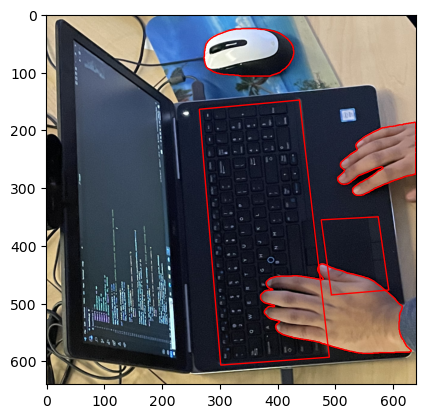

In [70]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

def visualize_annotations(png_file, txt_file):
    # Open the image file
    img = Image.open(png_file)
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    
    # Read annotations from the txt file
    with open(txt_file, 'r') as f:
        annotations = f.readlines()

    for annot in annotations:
        parts = annot.strip().split()
        class_index = int(parts[0])
        points = np.array(parts[1:], dtype=np.float32).reshape(-1, 2)
        
        # Rescale points from [0, 1] to image dimensions
        points[:, 0] *= 640
        points[:, 1] *= 640
        
        # Create a polygon and add it to the plot
        polygon = patches.Polygon(points, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(polygon)

    plt.show()

# Example usage
png_file = 'YOLO_training/train/images/laptop0_IMG_3607_resized.png'
txt_file = 'YOLO_training/train/labels/laptop0_IMG_3607_resized.txt'
visualize_annotations(png_file, txt_file)

In [73]:
!yolo task=detect mode=train model=yolov8m-seg-keyboard.pt data=dataset.yaml epochs=20 imgsz=640

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.1.18 🚀 Python-3.10.13 torch-2.2.1 CPU (Apple M2)
engine/trainer: task=segment, mode=train, model=yolov8m-seg-keyboard.pt, data=dataset.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=Non

In [80]:
#run 5 is best


import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the model
model = YOLO('runs/segment/train5/weights/best.pt')
# Load an image
img = '/Users/aneeshkalla/Desktop/HackTJ11.0/datasets/YOLO_training/val/images/laptop0_IMG_3625_resized.png'  # Update this path to your image

# Inference
results = model(img)
frame_with_overlay = results[0].plot()
cv2.imwrite("yolooutput.png", frame_with_overlay)
#print(frame_with_overl#
#plt.show(frame_with_overlay)
# Results
#print(results)  # Print text results
#results.show()  # Display the image with bounding boxes


image 1/1 /Users/aneeshkalla/Desktop/HackTJ11.0/datasets/YOLO_training/val/images/laptop0_IMG_3625_resized.png: 640x640 1 keyboard, 2 trackpads, 1 mouse, 3 hands, 626.4ms
Speed: 1.9ms preprocess, 626.4ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)


True